# MURA Challenge

In [1]:
#Load the requird libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from os import listdir
import pandas as pd
import os
import csv
import cv2
%matplotlib inline

# Run the foloowing 2 cells to setup Google Drive on Google Colab

In [ ]:
'''
#To set up Google Drive on Google Colab
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
'''

In [ ]:
'''
#To set up Google Drive on Google Colab
!mkdir -p drive
!google-drive-ocamlfuse drive
'''

In [ ]:
'''
current = os.getcwd()
print(current)
'''

In [ ]:
'''
os.listdir()
'''

In [ ]:
'''
root_Path = os.chdir("drive")
'''

# Loading Path to Images

In [2]:
#Load path to images
root_Path_CSV = 'C:/Users/Aashish/Desktop/MURA-v1.1/train_image_paths1.csv'
with open(root_Path_CSV) as csvfile:
    path = csv.reader(csvfile, delimiter = '\n')
    
    train_Image_Path = []
    
    for row in path:
        image = row[0]
        train_Image_Path.append(image)

In [3]:
#Printing paths
#length = len(train_Image_Path)
for counter, local_Path in enumerate(train_Image_Path):
    train_Image_Path[counter] = "C:/Users/Aashish/Desktop/" + local_Path
    serial_Number = str(counter) + ")."
    print(serial_Number, train_Image_Path[counter])

0). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png
1). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image2.png
2). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image3.png
3). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image1.png
4). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image2.png
5). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image3.png
6). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image1.png
7). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image2.png
8). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image3.png
9). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/image1.png
10). C:/Users/Aashish/Desktop/

In [4]:
#img = Image.open(imagePath[0])
#img.show()

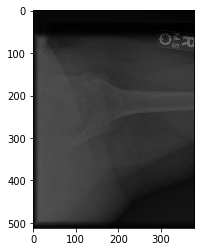

In [5]:
#print one of the images
img = mpimg.imread(train_Image_Path[0])
imgplot = plt.imshow(img)

# Loading Images and Labels

In [6]:
#Function to load images
def loadImages(path):
    
    loadedImages = []
    
    for i in range (0, len(train_Label_Path)):
        imageList = listdir(path[i])
        for image in imageList:
            img = Image.open(path[i] + image)
            loadedImages.append(img)
    
    return loadedImages

In [7]:
#Load path to labels and labels themselves
root_Path_Labels = 'C:/Users/Aashish/Desktop/MURA-v1.1/train_labeled_studies1.csv'
with open(root_Path_Labels) as csvfile:
    path = csv.reader(csvfile, delimiter = '\t')
    
    train_Label_Path = []
    train_Labels = []
    
    for row in path:
        image = row[0]
        label = row[1]
        train_Labels.append(label)
        train_Label_Path.append(image)

In [8]:
#Printing label paths
#length = len(train_Label_Path)
for counter, local_Path in enumerate(train_Label_Path):
    train_Label_Path[counter] = "C:/Users/Aashish/Desktop/" + local_Path
    serial_Number = str(counter) + ")."
    print(serial_Number, train_Label_Path[counter])

0). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/
1). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/
2). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/
3). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/
4). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00005/study1_positive/
5). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00006/study1_positive/
6). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00007/study1_positive/
7). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00007/study2_negative/
8). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00008/study1_positive/
9). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00009/study1_positive/
10). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00010/study1_positive/
11). C:/Users/Aashish/Desktop/MURA-v1.1/tr

In [9]:
#Printing labels
#length = len(train_Labels)
for counter, value in enumerate(train_Labels):
    serial_Number = str(counter) + ")."
    print(serial_Number, value)

0). 1
1). 1
2). 1
3). 1
4). 1
5). 1
6). 1
7). 0
8). 1
9). 1
10). 1
11). 1


In [10]:
#number of Images
imgs = loadImages(train_Label_Path)
count = 0
for img in imgs:
    count += 1
print(count)

30


# Creating Labels for Images

In [11]:
#Printing path to folers
for counter, path in enumerate(train_Label_Path):
    serial_Number = str(counter) + ")."
    print(serial_Number, path)

0). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/
1). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/
2). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/
3). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/
4). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00005/study1_positive/
5). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00006/study1_positive/
6). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00007/study1_positive/
7). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00007/study2_negative/
8). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00008/study1_positive/
9). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00009/study1_positive/
10). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00010/study1_positive/
11). C:/Users/Aashish/Desktop/MURA-v1.1/tr

In [12]:
#Printing path to images
for counter, path in enumerate(train_Image_Path):
    serial_Number = str(counter) + ")."
    print(serial_Number, path)

0). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png
1). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image2.png
2). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image3.png
3). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image1.png
4). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image2.png
5). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image3.png
6). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image1.png
7). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image2.png
8). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image3.png
9). C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/image1.png
10). C:/Users/Aashish/Desktop/

In [13]:
#Assigning images appropriate labels
new_Labels = []
for i in range (0, len(train_Image_Path)):
    if "positive" in train_Image_Path[i]:
        new_Labels.append(1)
    elif "negative" in train_Image_Path[i]:
        new_Labels.append(0)
    else:
        new_Labels.append(None)

In [14]:
#Printing new labels
for counter, value in enumerate(new_Labels):
    serial_Number = str(counter) + ")."
    print(serial_Number, "Image Path =", train_Image_Path[counter], "Label =", value)

0). Image Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png Label = 1
1). Image Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image2.png Label = 1
2). Image Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image3.png Label = 1
3). Image Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image1.png Label = 1
4). Image Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image2.png Label = 1
5). Image Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image3.png Label = 1
6). Image Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image1.png Label = 1
7). Image Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image2.png Label = 1
8). Image Path = C:/Users/Aashish/Deskto

In [15]:
#Create a function to Save_New_Labels
def save_New_Labels(image_Path, image_Labels):
    with open("new_Train_Labeled_Images.csv", "w", newline = "\n") as csvFile:
        writer = csv.writer(csvFile)
        for i in range(0, len(image_Path)):
            writer.writerow([image_Path[i], image_Labels[i]])

In [16]:
#Save new labels
save_New_Labels(train_Image_Path, new_Labels)

In [17]:
#Find Current Working Directory
cwd = os.getcwd()
print(cwd)

C:\Users\Aashish\Desktop\MURA


In [18]:
#Correct the new working directory name
correct_CWD = cwd.replace("\\", "/")
print(correct_CWD)

C:/Users/Aashish/Desktop/MURA


In [19]:
new_Labeled_Images_Path = correct_CWD + "/new_train_Labeled_Images.csv"
print(new_Labeled_Images_Path)

C:/Users/Aashish/Desktop/MURA/new_train_Labeled_Images.csv


In [20]:
#Open the newly created csv filw with new labels
with open(new_Labeled_Images_Path) as csvfile:
    path = csv.reader(csvfile, delimiter = ',')
    
    new_train_Image_Path = []
    new_Train_Image_Labels = []
    
    for row in path:
        path = row[0]
        label = row[1]
        new_train_Image_Path.append(path)
        new_Train_Image_Labels.append(label)


In [21]:
#Print apth and labels
for i in range(0, len(new_train_Image_Path)):
    serial_Number = str(i) + ")."
    print(serial_Number, "Path =", new_train_Image_Path[i], "|", "Labels =", new_Train_Image_Labels[i])

0). Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png | Labels = 1
1). Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image2.png | Labels = 1
2). Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image3.png | Labels = 1
3). Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image1.png | Labels = 1
4). Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image2.png | Labels = 1
5). Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image3.png | Labels = 1
6). Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image1.png | Labels = 1
7). Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image2.png | Labels = 1
8). Path = C:/Users/Aashish/Desktop/MURA-v1.1/train/XR_SHOULDER/